## Goals Option 1: How much are nearby Hospitals and ASCs paid for the same procedure?

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
%matplotlib inline

### d1 = Medicare Provider Utilization and Payment Data: Physician and Other Supplier PUF CY2017

Only reading in certain columns to avoid low memory error.

In [3]:
d1=pd.read_csv(
        'c:/users/erinm/Documents/healthcare-bluebook-green-team/data/Medicare_Provider_Utilization_and_Payment_Data__Physician_and_Other_Supplier_PUF_CY2017.tsv', 
        sep='\t',
        usecols=['National Provider Identifier', 'Entity Type of the Provider', 'Zip Code of the Provider', 'Provider Type', 'Place of Service', 'HCPCS Code', 'HCPCS Description', 'Number of Distinct Medicare Beneficiary/Per Day Services', 'Average Medicare Allowed Amount', 'Average Medicare Payment Amount']
)
d1.shape

C:\Users\erinm\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(9847443, 10)

In [4]:
d1.columns = ['npi', 'entity_type', 'orig_zip', 'provider_type', 'place_of_service', 'hcpcs_code', 'hcpcs_desc', 'no_dist_ben_per_day_svcs', 'avg_med_allowed_amt', 'avg_med_pay_amt']

In [5]:
d1.loc[:,'zip']= d1['orig_zip'].astype(str).str[:5]
del d1['orig_zip']
d1.columns

Index(['npi', 'entity_type', 'provider_type', 'place_of_service', 'hcpcs_code',
       'hcpcs_desc', 'no_dist_ben_per_day_svcs', 'avg_med_allowed_amt',
       'avg_med_pay_amt', 'zip'],
      dtype='object')

In [6]:
d1.head()

,npi,entity_type,provider_type,place_of_service,hcpcs_code,hcpcs_desc,no_dist_ben_per_day_svcs,avg_med_allowed_amt,avg_med_pay_amt,zip
0,1003000126,I,Internal Medicine,F,99217,Hospital observation care discharge,100,73.398800,56.827200,21502
1,1003000126,I,Internal Medicine,F,99218,Hospital observation care typically 30 minutes,26,100.080000,78.460000,21502
2,1003000126,I,Internal Medicine,F,99219,Hospital observation care typically 50 minutes,52,136.380000,102.807692,21502
3,1003000126,I,Internal Medicine,F,99220,Hospital observation care typically 70 minutes...,59,190.363729,141.293559,21502
4,1003000126,I,Internal Medicine,F,99221,"Initial hospital inpatient care, typically 30 ...",16,101.680000,79.710000,21502


In [43]:
d1.shape

(9847443, 10)

### create avg_patient_resp_% column

In [46]:
d1['avg_patient_resp_%'] = d1['avg_med_pay_amt'] / d1['avg_med_allowed_amt']

In [48]:
d1.head()

,npi,entity_type,provider_type,place_of_service,hcpcs_code,hcpcs_desc,no_dist_ben_per_day_svcs,avg_med_allowed_amt,avg_med_pay_amt,zip,avg_patient_resp_%
0,1003000126,I,Internal Medicine,F,99217,Hospital observation care discharge,100,73.398800,56.827200,21502,0.774225
1,1003000126,I,Internal Medicine,F,99218,Hospital observation care typically 30 minutes,26,100.080000,78.460000,21502,0.783973
2,1003000126,I,Internal Medicine,F,99219,Hospital observation care typically 50 minutes,52,136.380000,102.807692,21502,0.753833
3,1003000126,I,Internal Medicine,F,99220,Hospital observation care typically 70 minutes...,59,190.363729,141.293559,21502,0.742229
4,1003000126,I,Internal Medicine,F,99221,"Initial hospital inpatient care, typically 30 ...",16,101.680000,79.710000,21502,0.783930


### d2 = Provider Outpatient Hospital Charge Data by APC, CY2017

In [8]:
pd.read_csv(
    'c:/users/erinm/Documents/healthcare-bluebook-green-team/data/Provider_Outpatient_Hospital_Charge_Data_by_APC__CY2017.tsv', 
    sep='\t').columns

Index(['Provider_ID', 'Provider_Name', 'Provider_Street_Address',
       'Provider_City', 'Provider_State', 'Provider_Zip_Code', 'Provider_HRR',
       'APC', 'APC_Desc', 'Beneficiaries', 'CAPC_Services',
       'Average_Total_Submitted_Charges', 'Average_Medicare_Allowed_Amount',
       'Average_Medicare_Payment_Amount', 'Outlier_Services',
       'Average_Medicare_Outlier_Amount'],
      dtype='object')

In [52]:
d2 = pd.read_csv(
    'c:/users/erinm/Documents/healthcare-bluebook-green-team/data/Provider_Outpatient_Hospital_Charge_Data_by_APC__CY2017.tsv', 
    sep='\t',
     dtype={'Provider_Zip_Code':'str'}, 
    usecols=['Provider_ID','Provider_Name','Provider_Zip_Code','APC','APC_Desc', 'Beneficiaries', 'CAPC_Services','Average_Medicare_Allowed_Amount', 'Average_Medicare_Payment_Amount']
)
d2.shape

(61779, 9)

In [53]:
d2.columns = ['id', 'name', 'zip', 'apc', 'apc_desc', 'bens', 'capcs_svcs', 'avg_med_allowed_amt', 'avg_med_pay_amt']

In [54]:
d2.columns

Index(['id', 'name', 'zip', 'apc', 'apc_desc', 'bens', 'capcs_svcs',
       'avg_med_allowed_amt', 'avg_med_pay_amt'],
      dtype='object')

In [55]:
d4 = pd.read_excel('c:/users/erinm/documents/healthcare-bluebook-green-team/data/ZIP_CBSA_032020.xlsx', dtype={'ZIP':'str'}, usecols=[0,1])
d4.head()

,ZIP,CBSA
0,00501,35620
1,00601,38660
2,00602,10380
3,00603,10380
4,00604,10380


In [56]:
d4.columns = ['zip', 'cbsa']

In [57]:
d2['avg_patient_resp_%'] = d1['avg_med_pay_amt'] / d1['avg_med_allowed_amt']

In [58]:
d2.head()

,id,name,zip,apc,apc_desc,bens,capcs_svcs,avg_med_allowed_amt,avg_med_pay_amt,avg_patient_resp_%
0,10001,Southeast Alabama Medical Center,36301,5072,Level 2 Excision/ Biopsy/ Incision and Drainage,249.0,259,1038.45,826.28,0.774225
1,10001,Southeast Alabama Medical Center,36301,5073,Level 3 Excision/ Biopsy/ Incision and Drainage,52.0,53,1792.60,1423.25,0.783973
2,10001,Southeast Alabama Medical Center,36301,5091,Level 1 Breast/Lymphatic Surgery and Related P...,26.0,27,2113.58,1683.99,0.753833
3,10001,Southeast Alabama Medical Center,36301,5092,Level 2 Breast/Lymphatic Surgery and Related P...,23.0,23,3737.14,2977.55,0.742229
4,10001,Southeast Alabama Medical Center,36301,5112,Level 2 Musculoskeletal Procedures,17.0,17,1029.46,820.21,0.783930


## Merge d1 with zip code crosswalk

In [49]:
d1_d4 = pd.merge(d1, d4, on=('zip'), how='inner')
d1_d4.head()

,npi,entity_type,provider_type,place_of_service,hcpcs_code,hcpcs_desc,no_dist_ben_per_day_svcs,avg_med_allowed_amt,avg_med_pay_amt,zip,avg_patient_resp_%,cbsa
0,1003000126,I,Internal Medicine,F,99217,Hospital observation care discharge,100,73.398800,56.827200,21502,0.774225,19060
1,1003000126,I,Internal Medicine,F,99218,Hospital observation care typically 30 minutes,26,100.080000,78.460000,21502,0.783973,19060
2,1003000126,I,Internal Medicine,F,99219,Hospital observation care typically 50 minutes,52,136.380000,102.807692,21502,0.753833,19060
3,1003000126,I,Internal Medicine,F,99220,Hospital observation care typically 70 minutes...,59,190.363729,141.293559,21502,0.742229,19060
4,1003000126,I,Internal Medicine,F,99221,"Initial hospital inpatient care, typically 30 ...",16,101.680000,79.710000,21502,0.783930,19060


In [50]:
d1_d4.shape

(10491622, 12)

## Merge d2 with zip code crosswalk

In [16]:
d2_d4 = pd.merge(d2, d4, on=('zip'), how='inner')
d2_d4.head()

,id,name,zip,apc,apc_desc,bens,capcs_svcs,avg_med_allowed_amt,avg_med_pay_amount,cbsa
0,10001,Southeast Alabama Medical Center,36301,5072,Level 2 Excision/ Biopsy/ Incision and Drainage,249.0,259,1038.45,826.28,20020
1,10001,Southeast Alabama Medical Center,36301,5073,Level 3 Excision/ Biopsy/ Incision and Drainage,52.0,53,1792.60,1423.25,20020
2,10001,Southeast Alabama Medical Center,36301,5091,Level 1 Breast/Lymphatic Surgery and Related P...,26.0,27,2113.58,1683.99,20020
3,10001,Southeast Alabama Medical Center,36301,5092,Level 2 Breast/Lymphatic Surgery and Related P...,23.0,23,3737.14,2977.55,20020
4,10001,Southeast Alabama Medical Center,36301,5112,Level 2 Musculoskeletal Procedures,17.0,17,1029.46,820.21,20020


## d3 = APC to CPT/HCPCS crosswalk (Jan 2020 Addendum B)

In [17]:
d3 = pd.read_excel('c:/users/erinm/Documents/healthcare-bluebook-green-team/data/2020_january_web_addendum_b.12312019.xlsx',usecols=[0,1,3], skiprows=2)
d3.head()

,HCPCS Code,Short Descriptor,APC
0,00100,Anesth salivary gland,NaN
1,00102,Anesth repair of cleft lip,NaN
2,00103,Anesth blepharoplasty,NaN
3,00104,Anesth electroshock,NaN
4,00120,Anesth ear surgery,NaN


In [18]:
d3.columns=['hcpcs_code', 'crosswalk_short_desc', 'apc']

In [19]:
d3.shape

(16628, 3)

In [20]:
d3_nn=d3[d3['apc'].notnull()]
d3_nn.shape

(5942, 3)

In [21]:
d3_nnnn=d3_nn[d3_nn['hcpcs_code'].notnull()]
d3_nnnn.shape

(5942, 3)

## Merge d1_d4 with d3 (zip code crosswalk)

In [22]:
d1_d3_d4 = pd.merge(d1_d4, d3_nnnn, on=('hcpcs_code'), how='inner')
d1_d3_d4.shape

(4258746, 13)

## Merge d2 with d3 (zip code crosswalk)

In [23]:
d2_d3_d4 = pd.merge(d2_d4, d3_nnnn, on=('apc'), how='inner')
d2_d3_d4.shape

(5563029, 12)

## Filters for Goals Option 1 -provider data

Physician/Other Supplier Data Filters

Entity Type = 'O'

Provider Type = Ambulatory Surgical Center

CPT = 43249

In [27]:
filter1 = d1_d3_d4['entity_type'].isin(['O'])
filter2 = d1_d3_d4['provider_type'].isin(['Ambulatory Surgical Center'])
filter3 = d1_d3_d4['hcpcs_code'].isin(['43249'])

d134_option1_filters = d1_d3_d4[filter1 & filter2 & filter3]
d134_option1_filters.shape

(651, 13)

In [29]:
d134_option1_filters.to_csv('d1_filtered.csv')

In [30]:
d134_option1_filters.head()

,npi,entity_type,provider_type,place_of_service,hcpcs_code,hcpcs_desc,no_dist_ben_per_day_svcs,avg_med_allowed_amt,avg_med_pay_amt,zip,cbsa,crosswalk_short_desc,apc
2010002,1699054098,O,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,35,529.940000,403.025714,21502,19060,Esoph egd dilation <30 mm,5302.0
2010006,1386796332,O,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,45,576.920000,438.582000,43623,45780,Esoph egd dilation <30 mm,5302.0
2010021,1427491547,O,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,26,591.328846,458.089231,77030,26420,Esoph egd dilation <30 mm,5302.0
2010024,1679585772,O,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,46,599.010000,459.262609,77030,26420,Esoph egd dilation <30 mm,5302.0
2010027,1073587416,O,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,35,605.460000,472.930857,13210,45060,Esoph egd dilation <30 mm,5302.0


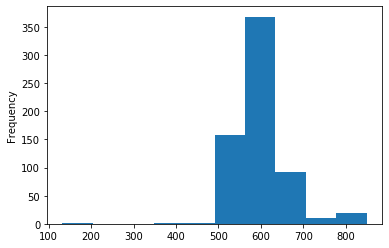

In [32]:
d134_option1_filters['avg_med_allowed_amt'].plot.hist()

## Filters for Goals Option 1 -hospital data

Filters for Hospital Outpatient

APC =5302

In [34]:
filter4 = d2_d3_d4['apc'].isin(['5302'])

d234_option1_filters = d2_d3_d4[filter4]
d234_option1_filters.shape

(157117, 12)

In [35]:
d234_option1_filters.to_csv('d2_filtered.csv')

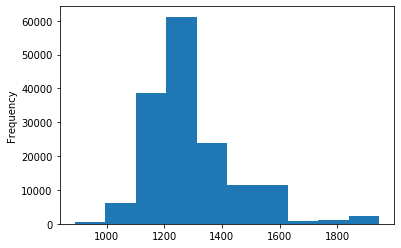

In [38]:
d234_option1_filters['avg_med_allowed_amt'].plot.hist()

In [39]:
d234_option1_filters.columns

Index(['id', 'name', 'zip', 'apc', 'apc_desc', 'bens', 'capcs_svcs',
       'avg_med_allowed_amt', 'avg_med_pay_amount', 'cbsa', 'hcpcs_code',
       'crosswalk_short_desc'],
      dtype='object')

In [42]:
d234_option1_filters['avg_patient_resp_%'] = d234_option1_filters['avg_med_pay_amount'] / d234_option1_filters['avg_med_allowed_amt']

C:\Users\erinm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
d1.loc[:,'zip']= d1['orig_zip'].astype(str).str[:5]